In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from scipy.spatial import distance
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

### Zadanie 1.

In [2]:
iris = datasets.load_iris()
 

features_train, features_test, labels_train, labels_test = train_test_split(iris.data, iris.target, test_size=0.3, train_size=0.7)

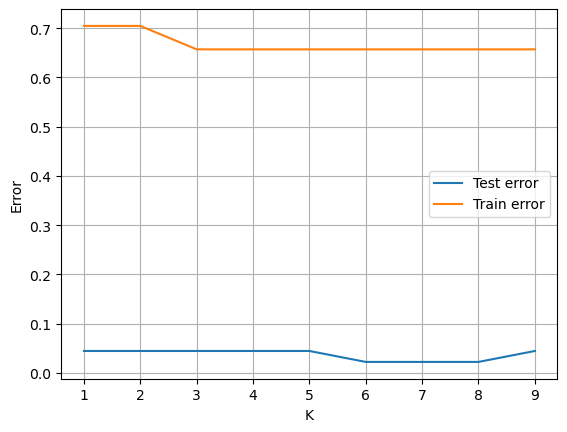

0.9777777777777777
6


In [3]:
k = 1
list_of_k = [1]
error_test = []
error_train = []
best_acc = 0
best_k = k
while True:
    predictions = []
    predictions_train = []
    for sample in features_test:
        # 2. For each example in the test set, we look for the k observations that are closest to our analyzed example. 
        # Use the Eukleidesa distance to determine the distance
        neighbors = np.zeros((features_train.shape[0], 2), dtype = float)
        neighbors[:,1] = labels_train
        for idx, known_sample in enumerate(features_train):
            neighbors[idx, 0] = distance.euclidean(sample, known_sample)

        neighbors = neighbors[np.argsort(neighbors[:,0])]
        knn = neighbors[0:k, 1]
        # 4. Use the most frequent value of the “k” nearest neighbors“ as the value for an unclassified example
        unique, counts = np.unique(knn, return_counts = True)
        predictions.append(unique[np.argmax(counts)])  
        
    accuracy = accuracy_score(labels_test, predictions)
    if accuracy > best_acc:
        best_acc = accuracy
        best_k = k
        
    for sample in features_train:
        neighbors_train = np.zeros((features_train.shape[0], 2), dtype = float)
        neighbors_train[:,1] = labels_train
        for idx, known_sample in enumerate(features_train):
            neighbors_train[idx, 0] = distance.euclidean(sample, known_sample)

        neighbors_train = neighbors_train[np.argsort(neighbors[:,0])]
        knn_train = neighbors_train[0:k, 1]
        # 4. Use the most frequent value of the “k” nearest neighbors“ as the value for an unclassified example
        unique, counts = np.unique(knn_train, return_counts = True)
        predictions_train.append(unique[np.argmax(counts)])   

    # 5. For each case of k, after classifying all examples in the test set, count the error
    errors = 0
    errors_train = 0
    for i in range(len(predictions)):
        if predictions[i] != labels_test[i]:
            errors +=1
    error_test.append(errors/len(predictions))
    
    for i in range(len(predictions_train)):
        if predictions_train[i] != labels_train[i]:
            errors_train +=1
    error_train.append(errors_train/len(predictions_train))
    
    if error_test[k-1] > error_test[k-2] and k > 1:
        break
    else:
        k += 1
        list_of_k.append(k)

plt.plot(list_of_k, error_test, label='Test error')
plt.plot(list_of_k, error_train, label='Train error')
plt.xlabel('K')
plt.ylabel('Error')
plt.grid()
plt.legend()
plt.show()
print(best_acc)
print(best_k)

### Zadanie 2.

In [4]:
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

db_iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(db_iris.data, db_iris.target, test_size=0.3, train_size=0.7)

k = best_k # wybrane z poprzedniego zadania

# uzywam sklearn do osiągnięcia tego samego co wyzej
classifier = KNeighborsClassifier(k)
classifier.fit(X_train, y_train)
accuracy = classifier.score(X_test, y_test)
accuracy

0.9777777777777777

### Zadanie 3

In [17]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf.fit(iris.data, iris.target)

DecisionTreeClassifier()

In [18]:
clf.predict(iris.data[:1, :])

array([0])

In [19]:
clf.predict_proba(iris.data[:1, :])

array([[1., 0., 0.]])

In [20]:
from six import StringIO  
import pydot 
dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph[0].write_pdf("iris.pdf")

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn import tree
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
from sklearn.metrics import ConfusionMatrixDisplay
  
# wczytywanie danych (np. z biblioteki keras)
from keras.datasets import mnist
dane = mnist.load_data()

#Ex.1.Divide the data into parameters X and answer y:
 
X = np.r_['0,2', np.array(dane[0][0]), np.array(dane[1][0])]
y = np.r_[np.array(dane[0][1]), np.array(dane[1][1])]
 
# Standardization
for i in range(X.shape[0]):
    X[i,:] = X[i,:]/np.std(X[i,:])

# Convert digit 10 -> 0 (error in the dataset)    
y[np.where(y==10)]=0
 
# the height and width of the picture with the number
h = 28
w = 28
 
# Ex 2. Please display the number of digits and the number of pixels per image
print(f'Digits: {X.shape[0]}')
print(f'Pixels: {X.shape[1]}x{X.shape[2]}')

Digits: 70000
Pixels: 28x28


In [22]:
def plot_mnist(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.05)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)).T, cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

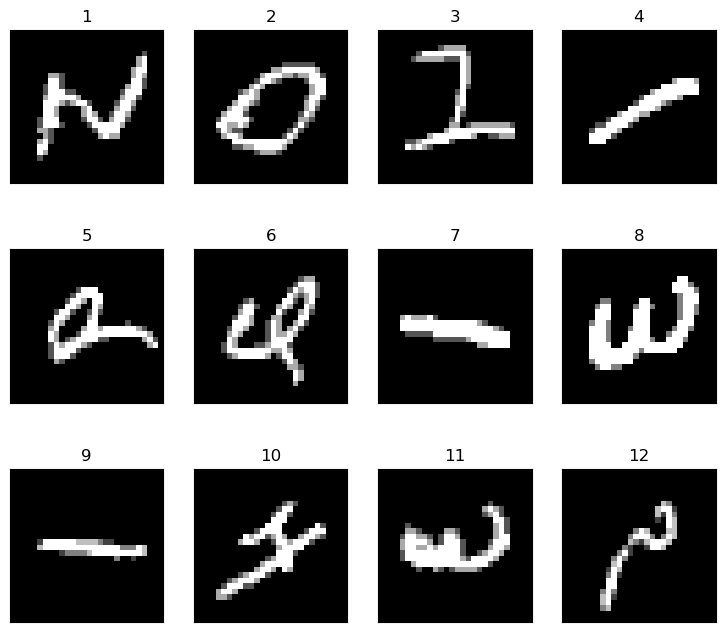

In [25]:
plot_mnist(X,[str(titl+1) for titl in range(12)], h, w)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7)

nsamples, nx, ny = X_train.shape
d2_X_train = X_train.reshape((nsamples,nx*ny))

nsamples, nx, ny = X_test.shape
d2_X_test = X_test.reshape((nsamples,nx*ny))

In [28]:
DEPTH = 10
clf = tree.DecisionTreeClassifier(max_depth=DEPTH)
clf.fit(d2_X_train, y_train)

y_pred = clf.predict(d2_X_test)

In [30]:
f1 = f1_score(y_test, y_pred, average='micro')
print(f'F1 score = {f1}')

F1 score = 0.8274761904761905


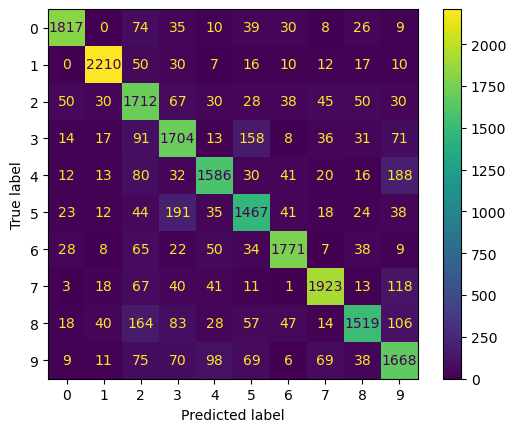

In [31]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()
plt.show()

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      2098
           1       0.93      0.94      0.94      2287
           2       0.79      0.84      0.81      2116
           3       0.82      0.75      0.78      2175
           4       0.80      0.83      0.82      2067
           5       0.72      0.77      0.75      1960
           6       0.89      0.86      0.88      2021
           7       0.88      0.85      0.87      2167
           8       0.81      0.73      0.77      2086
           9       0.75      0.79      0.77      2023

    accuracy                           0.83     21000
   macro avg       0.83      0.83      0.83     21000
weighted avg       0.83      0.83      0.83     21000

